## 1. Understanding the data

 (I have timestamp and a value given by TS tool for those 6 type of news people reaction: more postive may be good reaction and the more negative is bad reaction) (Close price is the dependent variable)
 (Multivariate time series :- The dataset contains more than one time-dependent variable.)
 #### Components of a Time Series
Trend : Trend is a general direction in which something is developing or changing. So we see an increasing trend in this time series.

Seasonality : Another clear pattern can also be seen in the above time series, i.e., the pattern is repeating at regular time interval which is known as the seasonality. Any predictable change or pattern in a time series that recurs or repeats over a specific time period can be said to be seasonality.
 
### 1.1. Hypothesis Generation
Point out factors affecting the dependent variable (price).
* Which of those time series has an impact on cocoa future price?
* Combinning two of them(Price forcast news and Weather damage news) does it improve?
* Are those 6 diffrent varaibles correlate eachother (have those news has similarity between them)?
* Is it possible to make a settle price direction forcast through the news?

### 1.2.Importing neccessary libraries, loading the dataset and do some preprocesses

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime    # To access datetime 
from matplotlib import pyplot
import seaborn as sns 
import pandas_profiling
#from pandas.plotting import scatter_matrix

## Cleanning data

In [2]:
# Changing the object datatype of Exchange date into datetime64 
df_main = pd.read_csv('LCCc1_oct.csv', parse_dates=['Exchange Date'])
df_main.head()

,Close price,Exchange Date
0,561,2000-01-04
1,560,2000-01-05
2,556,2000-01-06
3,564,2000-01-07
4,565,2000-01-10


In [3]:
#df_main.info()

### Price forcast

In [4]:
# Changing "object" datatype of 'coc_mpyns_prfr' Timestamp into datetime format  
df_mpyns_p = pd.read_csv('price_forecast-coc_mpyns_prfr.csv', parse_dates=['Timestamp'])
df_mpyns_p.head()

,LQC(coc_mpyns_prfr),Timestamp
0,0.0,2000-01-01
1,0.0,2000-01-02
2,0.0,2000-01-03
3,0.0,2000-01-04
4,0.0,2000-01-05


In [5]:
#df_mpyns_p.info()

In [6]:
# Merging the main dataframe to df_mpyns
df_merge1 = df_main.merge(df_mpyns_p, left_on='Exchange Date', right_on='Timestamp')

In [7]:
df_merge1.head()

,Close price,Exchange Date,LQC(coc_mpyns_prfr),Timestamp
0,561,2000-01-04,0.000000,2000-01-04
1,560,2000-01-05,0.000000,2000-01-05
2,556,2000-01-06,-0.004343,2000-01-06
3,564,2000-01-07,0.002181,2000-01-07
4,565,2000-01-10,-0.014851,2000-01-10


In [8]:
# Changing the coc_mpys_prfr object datatype to datetime 
df_mpys_p = pd.read_csv('price_forecast-coc_mpys_prfr.csv', parse_dates=['Timestamp'])
df_mpys_p.head()

,LQC(coc_mpys_prfr),Timestamp
0,0.0,2000-01-01
1,0.0,2000-01-02
2,0.0,2000-01-03
3,0.0,2000-01-04
4,0.0,2000-01-05


In [9]:
#df_mpys_p.info()

In [10]:
# Merging df_merge with df_mpys
df_merge2 = df_merge1.merge(df_mpys_p, left_on='Exchange Date', right_on='Timestamp')
df_merge2.head()

,Close price,Exchange Date,LQC(coc_mpyns_prfr),Timestamp_x,LQC(coc_mpys_prfr),Timestamp_y
0,561,2000-01-04,0.000000,2000-01-04,0.0,2000-01-04
1,560,2000-01-05,0.000000,2000-01-05,0.0,2000-01-05
2,556,2000-01-06,-0.004343,2000-01-06,0.0,2000-01-06
3,564,2000-01-07,0.002181,2000-01-07,0.0,2000-01-07
4,565,2000-01-10,-0.014851,2000-01-10,0.0,2000-01-10


In [11]:
# Deleting the unwanted or duplecated date
del df_merge2['Timestamp_x']
del df_merge2['Timestamp_y']
df_merge2.head()

,Close price,Exchange Date,LQC(coc_mpyns_prfr),LQC(coc_mpys_prfr)
0,561,2000-01-04,0.000000,0.0
1,560,2000-01-05,0.000000,0.0
2,556,2000-01-06,-0.004343,0.0
3,564,2000-01-07,0.002181,0.0
4,565,2000-01-10,-0.014851,0.0


In [12]:
# Changing the coc_mpys_prfr object datatype to datetime 
df_mpyn_p = pd.read_csv('price_forecast-coc_mpyn_prfr.csv', parse_dates=['Timestamp'])
df_mpyn_p.head()

,LQC(coc_mpyn_prfr),Timestamp
0,0.0,2000-01-01
1,0.0,2000-01-02
2,0.0,2000-01-03
3,0.0,2000-01-04
4,0.0,2000-01-05


In [13]:
# Merging
df_merge3 = df_merge2.merge(df_mpyn_p, left_on='Exchange Date', right_on='Timestamp')
df_merge3.head()

,Close price,Exchange Date,LQC(coc_mpyns_prfr),LQC(coc_mpys_prfr),LQC(coc_mpyn_prfr),Timestamp
0,561,2000-01-04,0.000000,0.0,0.000000,2000-01-04
1,560,2000-01-05,0.000000,0.0,0.000000,2000-01-05
2,556,2000-01-06,-0.004343,0.0,-0.004343,2000-01-06
3,564,2000-01-07,0.002181,0.0,0.002181,2000-01-07
4,565,2000-01-10,-0.014851,0.0,-0.014851,2000-01-10


In [14]:
# delete the unwanted time "Timestamp"
del df_merge3['Timestamp']
df_merge3.head()

,Close price,Exchange Date,LQC(coc_mpyns_prfr),LQC(coc_mpys_prfr),LQC(coc_mpyn_prfr)
0,561,2000-01-04,0.000000,0.0,0.000000
1,560,2000-01-05,0.000000,0.0,0.000000
2,556,2000-01-06,-0.004343,0.0,-0.004343
3,564,2000-01-07,0.002181,0.0,0.002181
4,565,2000-01-10,-0.014851,0.0,-0.014851


In [15]:
#df_merge3.info()

### Weather Damage

In [16]:
# Changing the 'object' datatype into 'datetime' 
df_mpyns_w = pd.read_csv('weather_damage_coc-mpyns-wdam.csv', parse_dates=['Timestamp'])
df_mpyns_w.head()

,LQC(coc-mpyns-wdam),Timestamp
0,0.018868,2000-01-01
1,0.123457,2000-01-02
2,0.014085,2000-01-03
3,0.000000,2000-01-04
4,0.000000,2000-01-05


In [17]:
#df_mpyns_w.info()

In [18]:
# Merging 'df_mpyns_w' with 'df_merge3'
df_merge4 = df_merge3.merge(df_mpyns_w, left_on='Exchange Date', right_on='Timestamp')
df_merge4.head()

,Close price,Exchange Date,LQC(coc_mpyns_prfr),LQC(coc_mpys_prfr),LQC(coc_mpyn_prfr),LQC(coc-mpyns-wdam),Timestamp
0,561,2000-01-04,0.000000,0.0,0.000000,0.000000,2000-01-04
1,560,2000-01-05,0.000000,0.0,0.000000,0.000000,2000-01-05
2,556,2000-01-06,-0.004343,0.0,-0.004343,0.006369,2000-01-06
3,564,2000-01-07,0.002181,0.0,0.002181,0.000000,2000-01-07
4,565,2000-01-10,-0.014851,0.0,-0.014851,0.000000,2000-01-10


In [19]:
# delete the unwanted time "Timestamp"
del df_merge4['Timestamp']
df_merge4.head()

,Close price,Exchange Date,LQC(coc_mpyns_prfr),LQC(coc_mpys_prfr),LQC(coc_mpyn_prfr),LQC(coc-mpyns-wdam)
0,561,2000-01-04,0.000000,0.0,0.000000,0.000000
1,560,2000-01-05,0.000000,0.0,0.000000,0.000000
2,556,2000-01-06,-0.004343,0.0,-0.004343,0.006369
3,564,2000-01-07,0.002181,0.0,0.002181,0.000000
4,565,2000-01-10,-0.014851,0.0,-0.014851,0.000000


In [20]:
# Changing the 'object' datatype into 'datetime' 
df_mpyn_w = pd.read_csv('weather_damage_coc-mpyn-wdam.csv', parse_dates=['Timestamp'])
df_mpyn_w.head()

,LQC(coc-mpyn-wdam),Timestamp
0,0.000000,2000-01-01
1,0.000000,2000-01-02
2,0.333333,2000-01-03
3,0.000000,2000-01-04
4,0.000000,2000-01-05


In [21]:
# Merging 'df_mpyn_w' with 'df_merge4'
df_merge5 = df_merge4.merge(df_mpyn_w, left_on='Exchange Date', right_on='Timestamp')
df_merge5.head()

,Close price,Exchange Date,LQC(coc_mpyns_prfr),LQC(coc_mpys_prfr),LQC(coc_mpyn_prfr),LQC(coc-mpyns-wdam),LQC(coc-mpyn-wdam),Timestamp
0,561,2000-01-04,0.000000,0.0,0.000000,0.000000,0.000000,2000-01-04
1,560,2000-01-05,0.000000,0.0,0.000000,0.000000,0.000000,2000-01-05
2,556,2000-01-06,-0.004343,0.0,-0.004343,0.006369,0.095238,2000-01-06
3,564,2000-01-07,0.002181,0.0,0.002181,0.000000,0.000000,2000-01-07
4,565,2000-01-10,-0.014851,0.0,-0.014851,0.000000,0.000000,2000-01-10


In [22]:
# delete the unwanted time "Timestamp"
del df_merge5['Timestamp']
df_merge5.head()

,Close price,Exchange Date,LQC(coc_mpyns_prfr),LQC(coc_mpys_prfr),LQC(coc_mpyn_prfr),LQC(coc-mpyns-wdam),LQC(coc-mpyn-wdam)
0,561,2000-01-04,0.000000,0.0,0.000000,0.000000,0.000000
1,560,2000-01-05,0.000000,0.0,0.000000,0.000000,0.000000
2,556,2000-01-06,-0.004343,0.0,-0.004343,0.006369,0.095238
3,564,2000-01-07,0.002181,0.0,0.002181,0.000000,0.000000
4,565,2000-01-10,-0.014851,0.0,-0.014851,0.000000,0.000000


In [23]:
# Changing the 'object' datatype into 'datetime' 
df_mpys_w = pd.read_csv('weather_damage_coc-mpys-wdam.csv', parse_dates=['Timestamp'])
df_mpys_w.head()

,LQC(coc-mpys-wdam),Timestamp
0,0.018868,2000-01-01
1,0.123457,2000-01-02
2,0.014085,2000-01-03
3,0.000000,2000-01-04
4,0.000000,2000-01-05


In [24]:
# Merging 'df_mpyn_w' with 'df_merge5'
df_merge6 = df_merge5.merge(df_mpys_w, left_on='Exchange Date', right_on='Timestamp')
df_merge6.head()

,Close price,Exchange Date,LQC(coc_mpyns_prfr),LQC(coc_mpys_prfr),LQC(coc_mpyn_prfr),LQC(coc-mpyns-wdam),LQC(coc-mpyn-wdam),LQC(coc-mpys-wdam),Timestamp
0,561,2000-01-04,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,2000-01-04
1,560,2000-01-05,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,2000-01-05
2,556,2000-01-06,-0.004343,0.0,-0.004343,0.006369,0.095238,0.006369,2000-01-06
3,564,2000-01-07,0.002181,0.0,0.002181,0.000000,0.000000,0.000000,2000-01-07
4,565,2000-01-10,-0.014851,0.0,-0.014851,0.000000,0.000000,0.000000,2000-01-10


In [25]:
# delete the unwanted time "Timestamp"
del df_merge6['Timestamp']
df_merge6.head()

,Close price,Exchange Date,LQC(coc_mpyns_prfr),LQC(coc_mpys_prfr),LQC(coc_mpyn_prfr),LQC(coc-mpyns-wdam),LQC(coc-mpyn-wdam),LQC(coc-mpys-wdam)
0,561,2000-01-04,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
1,560,2000-01-05,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
2,556,2000-01-06,-0.004343,0.0,-0.004343,0.006369,0.095238,0.006369
3,564,2000-01-07,0.002181,0.0,0.002181,0.000000,0.000000,0.000000
4,565,2000-01-10,-0.014851,0.0,-0.014851,0.000000,0.000000,0.000000


In [26]:
# Total extracted data
#df_merge6.info()

In [27]:
# Change the datatype of close price in to int
df_merge6['Close price'] = df_merge6['Close price'].str.replace(',','').astype(int) # Replace the comma ',' by nothing and change the data type of close price to integer 

In [28]:
# Change the column name of close price, and Exchange Date  
df_merge6.rename(columns={'Close price':'Close_price', 'Exchange Date':'Timestamp'
                         }, inplace=True)
 
#print(df_merge6.columns) # Check the changed column names 

In [29]:
#df_merge6.info()

## EDA (Exploratory Data Analysis)

### 1.3. Data Description


#### Column Name description
1. Close_price :- Previous COCOA closing price of each day.
2. Timestamp:-continious recorded time series data for about 20 years.
3. LQC(coc_mpyns_prfr):- Each day value given by TS on Cocoa Market pyscology news (social) price forcast.
4. LQC(coc_mpys_prfr) :- Each day value given by TS on Cocoa Market pyscology social media price forcast.
5. LQC(coc_mpyn_prfr) :- Each day value given by TS on Cocoa Market pyscology news price forcast.
6. LQC(coc-mpyns-wdam):- Each day value given by TS on Cocoa Market pyscology news (social) weather damage.
7. LQC(coc-mpyn-wdam):- Each day value given by TS on Cocoa Market pyscology news weather damage.
8. LQC(coc-mpys-wdam):- Each day value given by TS on Cocoa Market pyscology social media weather damage.

 Here "Close_price" is our dependent variable and the rest of the data is the independent variables or predictor variable.

Decribe what is descriptive statstics and Inferential statstics means and explain below statstis types 

Descriptive statstics

1. Measures of freqency:- numbers and percentiles
2. Measures of central tendency:- mean , meadian and mode 
3. measures of spread (desperssion):- standared deviation, variance and quartiles
4. Measures of position :- percentiles, quartiles and standared score

### 1.4 Feature extraction
Haypothesis Generation: Hypothesis generation helps us to point out the factors which might affect our dependent variable.
1. At which of the time is the price rises and at which of the time is really decreses, which of the time is constant
   Check the above thing in yearly, and time, close price and the effect of the choosen variable after correlation measure and pca application. 

### 1.5 Exploratory data analysis 

#### First let's see Which of those time series has an impact on cocoa future price one by one with ?
1. (Check the time series) Check close price with Time in deferent way (Yearly, monthly)(first change the datatype of vlose price to integer)
2. Check LQC(coc_mpyns_prfr) with time time (Impacts of this news value with each timestamp yearly, monthly)
3. Check LQC(coc_mpys_prfr) with time time (Impacts of this news value with each timestamp yearly, monthly)
4. Check LQC(coc_mpyn_prfr) with time time (Impacts of this news value with each timestamp yearly, monthly)
5. Check LQC(coc-mpyns-wdam) with time time (Impacts of this news value with each timestamp yearly, monthly)
6. Check LQC(coc-mpyn-wdam) with time time (Impacts of this news value with each timestamp yearly, monthly)
7. Check LQC(coc-mpys-wdam) with time time (Impacts of this news value with each timestamp yearly, monthly)
8. Are those six of the feauture correlate each other(Is there correlation between them)?

* Principal Component Analysis (PCA)
* CHi-square
* moving-window average

Under information taken from this book :-> 
"Applied multivariate Statistical Analysis (4th edition)"
"PRIMER of Bio-Statstics (4th edition)"

Correspondence analysis: - main idea is to develop simple indices that will show the relationship between the rows and columns 
                          categories. These indices will tell as simultaneously which column categories have more weight in a 
                     raw catagory and vice versa. It provides tools for analyzing the association between rows and columns of 
                   contingency tables. The contingency table is a two-entry frequency table where the joint frequencies of two 
                    qualitative variables are reported.
                     
Like principal component analysis, correspondence analysis is also related to the issue of reducing the dimension of the table. Additionally, the issue of decomposing the table into its factors, here the idea is to extract the indices in decreasing order of importance so that the main information of the table can be summarized in spaces with smaller dimensions’ example: if only two factors (indices) are used the result can be shown in two dimensional graphs, showing the relationship between the rows and columns of the table. 
    
Chi-square decomposition: - An alternative way of measuring the assocciation between the row and column catagories is a decomposition of the value of the X square of 2 test statstics. 

PCA (Principal Component Analysis)


In [30]:
df_merge6.head()

,Close_price,Timestamp,LQC(coc_mpyns_prfr),LQC(coc_mpys_prfr),LQC(coc_mpyn_prfr),LQC(coc-mpyns-wdam),LQC(coc-mpyn-wdam),LQC(coc-mpys-wdam)
0,561,2000-01-04,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
1,560,2000-01-05,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
2,556,2000-01-06,-0.004343,0.0,-0.004343,0.006369,0.095238,0.006369
3,564,2000-01-07,0.002181,0.0,0.002181,0.000000,0.000000,0.000000
4,565,2000-01-10,-0.014851,0.0,-0.014851,0.000000,0.000000,0.000000


In [31]:
# Check the shape of the dataset
df_merge6.shape # The preproccesed dataset is 4808 rows by 8 column.

(4808, 8)

In [32]:
# General quantitative description of the data 
df_merge6.describe()

,Close_price,LQC(coc_mpyns_prfr),LQC(coc_mpys_prfr),LQC(coc_mpyn_prfr),LQC(coc-mpyns-wdam),LQC(coc-mpyn-wdam),LQC(coc-mpys-wdam)
count,4808.000000,4808.000000,4808.000000,4808.000000,4808.000000,4808.000000,4808.000000
mean,1429.751664,0.000824,0.001892,0.000824,0.025440,0.063489,0.025440
std,519.695129,0.004773,0.027485,0.004773,0.033412,0.165098,0.033412
min,508.000000,-0.050505,-0.200000,-0.050505,-0.024390,-1.000000,-0.024390
25%,914.000000,0.000000,0.000000,0.000000,0.003840,0.000000,0.003840
50%,1479.000000,0.000000,0.000000,0.000000,0.014087,0.000000,0.014087
75%,1856.000000,0.001726,0.000000,0.001726,0.036103,0.043908,0.036103
max,2713.000000,0.053425,1.000000,0.053425,0.571429,1.000000,0.571429


## Create an inline report

In [33]:
# # Check the correlation between the variables (scatterplot matrix) with ‘kde’ Kernel Density Estimation 
#scat_plo2 = pd.plotting.scatter_matrix(df_merge6, alpha=0.2, figsize=(25, 20), diagonal='kde')

In [34]:
# Check the correlation between the variables (Correlation Matrix)
# Calculate the correlation cooeficient between the variables (Pearson correlation coefficient)
correlations = df_merge6.corr()
correlations

,Close_price,LQC(coc_mpyns_prfr),LQC(coc_mpys_prfr),LQC(coc_mpyn_prfr),LQC(coc-mpyns-wdam),LQC(coc-mpyn-wdam),LQC(coc-mpys-wdam)
Close_price,1.000000,0.104243,0.030297,0.104243,-0.290673,0.072266,-0.290673
LQC(coc_mpyns_prfr),0.104243,1.000000,0.023747,1.000000,-0.067030,0.006496,-0.067030
LQC(coc_mpys_prfr),0.030297,0.023747,1.000000,0.023747,-0.009772,-0.012036,-0.009772
LQC(coc_mpyn_prfr),0.104243,1.000000,0.023747,1.000000,-0.067030,0.006496,-0.067030
LQC(coc-mpyns-wdam),-0.290673,-0.067030,-0.009772,-0.067030,1.000000,0.071102,1.000000
LQC(coc-mpyn-wdam),0.072266,0.006496,-0.012036,0.006496,0.071102,1.000000,0.071102
LQC(coc-mpys-wdam),-0.290673,-0.067030,-0.009772,-0.067030,1.000000,0.071102,1.000000


(https://pythonfordatascience.org/variance-covariance-correlation/)
If the correlation coefficient value is positive, it means as one variable increase so does the other, and if the correlation coefficient value is negative, it means as one variable increases the other decreases. If the correlation coefficient is negative, the way to see which variable increases/decreases is to plot the data. It’s usually plotted as a scatter plot.

There are not set standards for what is considered a weak or strong correlation. It’s usually field dependent, but a guideline is below.

r value	     versus       Strength          
0.0 – 0.2	       Weak correlation,  
     0.3 – 0.6	         Moderate correlation,  
     0.7 – 1.0	         Strong correlation,


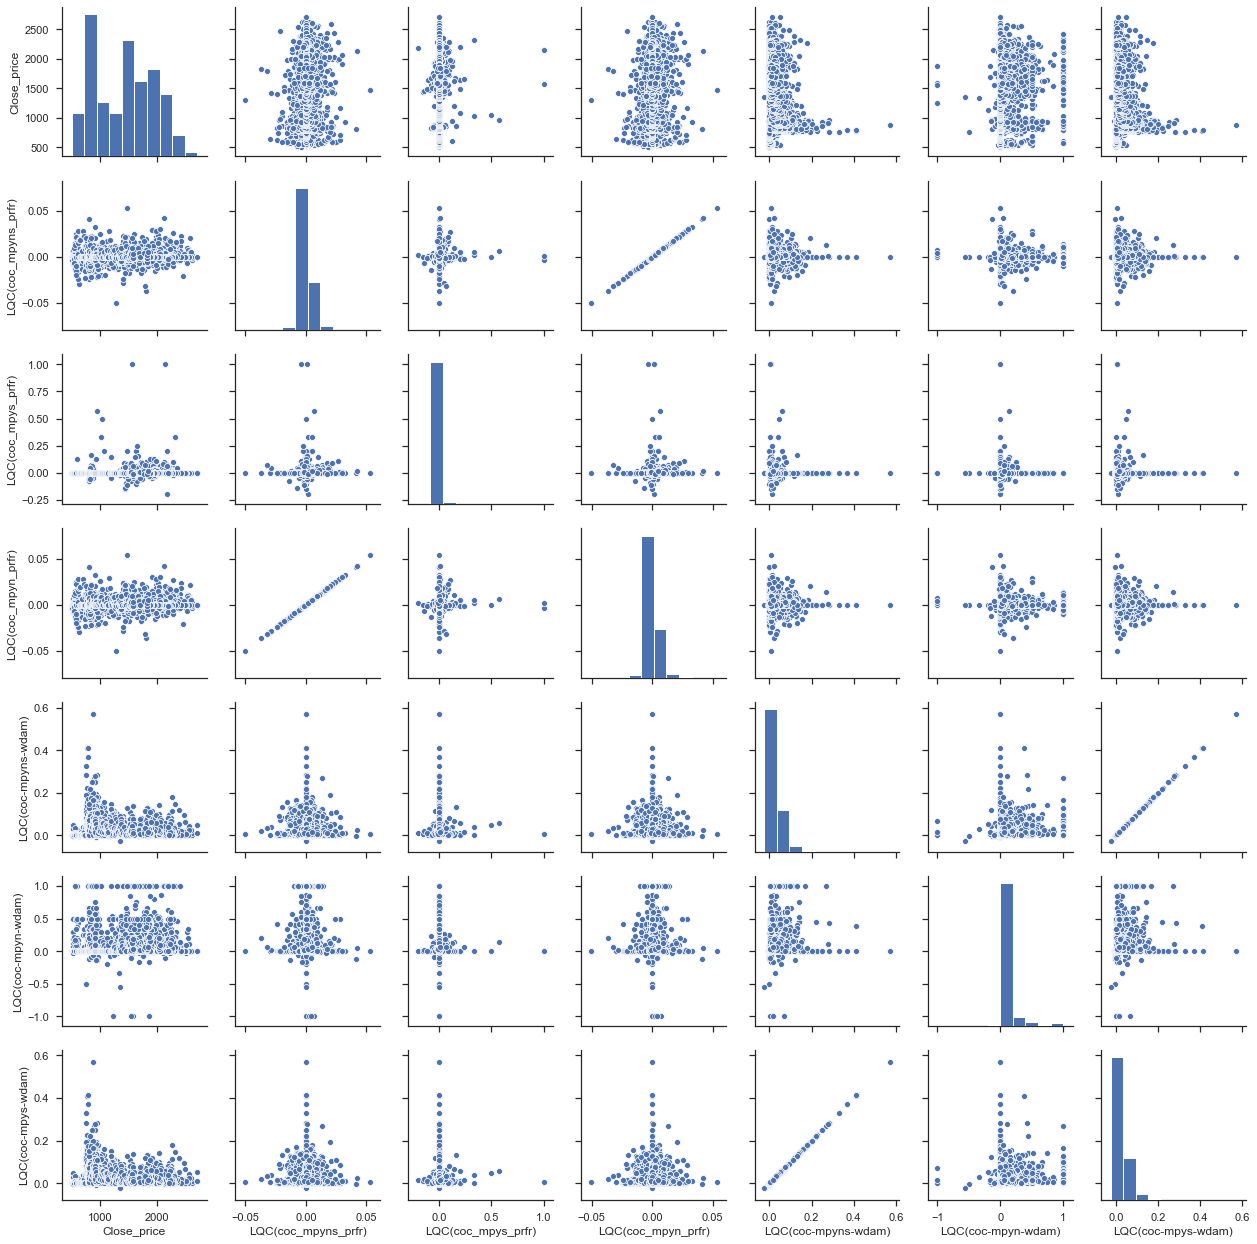

In [35]:
# Pairplot to visualize the correlation between the variables
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df_merge6)

In [35]:
# Drop(delete) highly correlated variables "LQC(coc-mpys-wdam)"   
del df_merge6['LQC(coc-mpys-wdam)']
df_merge6.head()

,Close_price,Timestamp,LQC(coc_mpyns_prfr),LQC(coc_mpys_prfr),LQC(coc_mpyn_prfr),LQC(coc-mpyns-wdam),LQC(coc-mpyn-wdam)
0,561,2000-01-04,0.000000,0.0,0.000000,0.000000,0.000000
1,560,2000-01-05,0.000000,0.0,0.000000,0.000000,0.000000
2,556,2000-01-06,-0.004343,0.0,-0.004343,0.006369,0.095238
3,564,2000-01-07,0.002181,0.0,0.002181,0.000000,0.000000
4,565,2000-01-10,-0.014851,0.0,-0.014851,0.000000,0.000000


In [36]:
# Drop(delete) highly correlated variables "LQC(coc_mpyns_prfr)"
del df_merge6['LQC(coc_mpyns_prfr)']
df_merge6.head()

,Close_price,Timestamp,LQC(coc_mpys_prfr),LQC(coc_mpyn_prfr),LQC(coc-mpyns-wdam),LQC(coc-mpyn-wdam)
0,561,2000-01-04,0.0,0.000000,0.000000,0.000000
1,560,2000-01-05,0.0,0.000000,0.000000,0.000000
2,556,2000-01-06,0.0,-0.004343,0.006369,0.095238
3,564,2000-01-07,0.0,0.002181,0.000000,0.000000
4,565,2000-01-10,0.0,-0.014851,0.000000,0.000000


<h3>Indexing and Resampling </h3>

In [37]:
# Change the Index of the dataframe by Timestamp
df_merge7 = df_merge6.set_index('Timestamp')
df_merge7.head()

,Close_price,LQC(coc_mpys_prfr),LQC(coc_mpyn_prfr),LQC(coc-mpyns-wdam),LQC(coc-mpyn-wdam)
Timestamp,,,,,
2000-01-04,561,0.0,0.000000,0.000000,0.000000
2000-01-05,560,0.0,0.000000,0.000000,0.000000
2000-01-06,556,0.0,-0.004343,0.006369,0.095238
2000-01-07,564,0.0,0.002181,0.000000,0.000000
2000-01-10,565,0.0,-0.014851,0.000000,0.000000


<h3> Indexing yearly</h3>

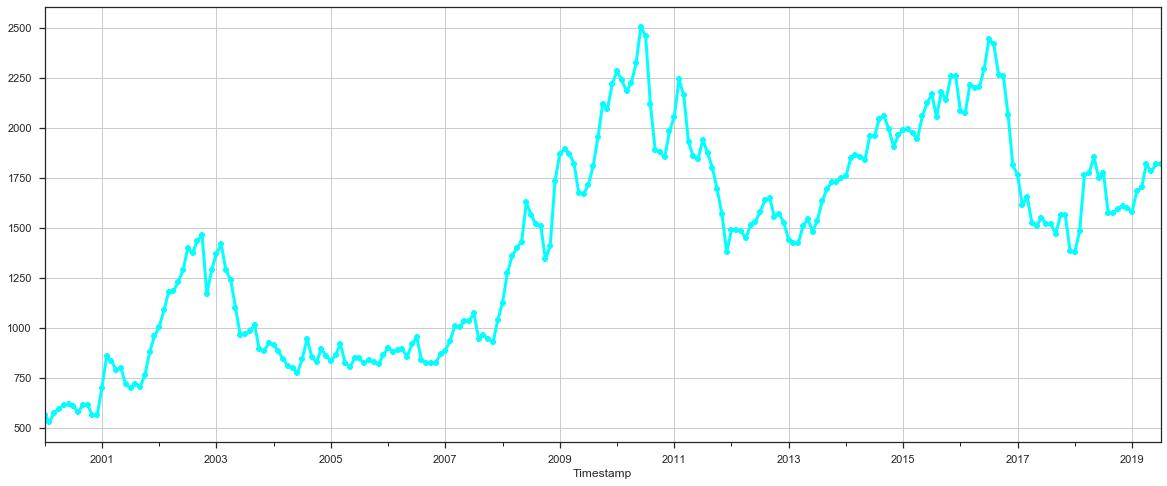

In [354]:
plt.figure(figsize=(20,8))
#plt.title('Yearly close price change or difference') 
df_merge7.Close_price.resample('M').mean().plot(color='cyan',linewidth=3, marker="8", grid = True )

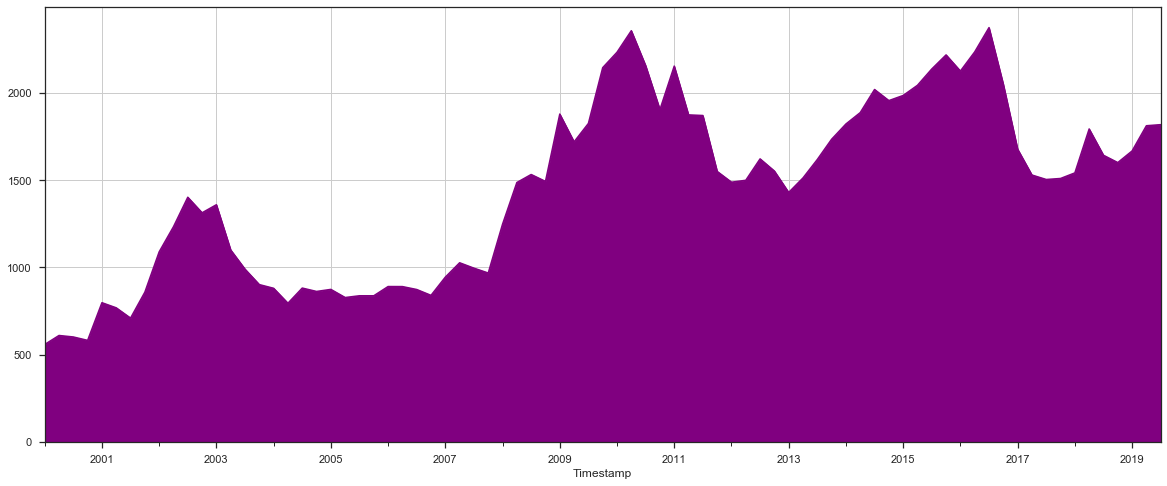

In [355]:
plt.figure(figsize=(20,8))
#plt.title('Quarterly close price change or difference') 
df_merge7.Close_price.resample('Q').mean().plot.area(color='purple', grid = True)

<h3> Trend of the data on Monthly basis <h3/>

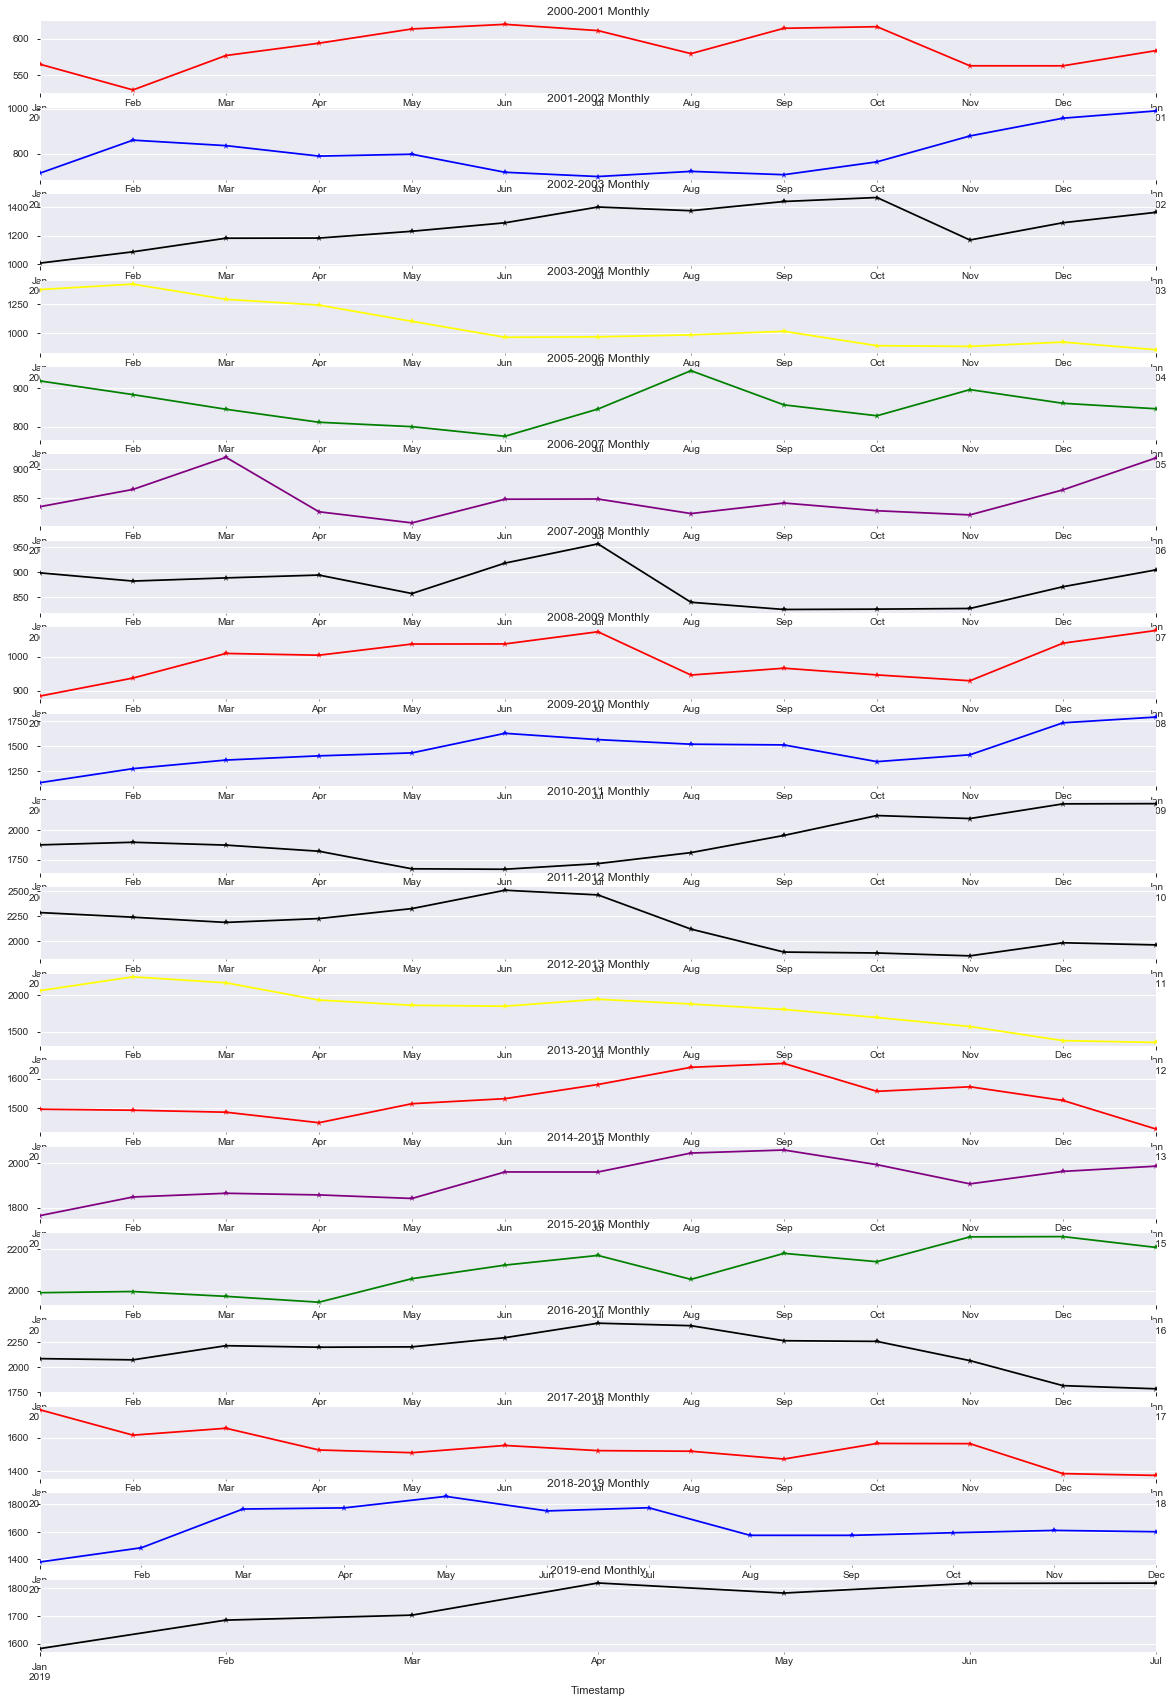

In [46]:
# Deviding the data on monthly basis
sam1 = df_merge7["2000-01-04":"2001-01-04"].Close_price.resample('M').mean()
sam2 = df_merge7["2001-01-04":"2002-01-04"].Close_price.resample('M').mean()
sam3 = df_merge7["2002-01-04":"2003-01-04"].Close_price.resample('M').mean()
sam4 = df_merge7["2003-01-04":"2004-01-04"].Close_price.resample('M').mean()
sam5 = df_merge7["2004-01-04":"2005-01-04"].Close_price.resample('M').mean()
sam6 = df_merge7["2005-01-04":"2006-01-04"].Close_price.resample('M').mean()
sam7 = df_merge7["2006-01-04":"2007-01-04"].Close_price.resample('M').mean()
sam8 = df_merge7["2007-01-04":"2008-01-04"].Close_price.resample('M').mean()
sam9 = df_merge7["2008-01-04":"2009-01-04"].Close_price.resample('M').mean()
sam10 = df_merge7["2009-01-04":"2010-01-04"].Close_price.resample('M').mean()

sam11 = df_merge7["2010-01-04":"2011-01-04"].Close_price.resample('M').mean()
sam12 = df_merge7["2011-01-04":"2012-01-04"].Close_price.resample('M').mean()
sam13 = df_merge7["2012-01-04":"2013-01-04"].Close_price.resample('M').mean()
sam14 = df_merge7["2014-01-04":"2015-01-04"].Close_price.resample('M').mean()
sam15 = df_merge7["2015-01-04":"2016-01-04"].Close_price.resample('M').mean()
sam16 = df_merge7["2016-01-04":"2017-01-04"].Close_price.resample('M').mean()
sam17 = df_merge7["2017-01-04":"2018-01-04"].Close_price.resample('M').mean()
sam18 = df_merge7["2018-01-04":"2019-01-04"].Close_price.resample('M').mean()
sam19 = df_merge7["2019-01-04":].Close_price.resample('M').mean()

# plotting
fig, axs = plt.subplots(19,1)
sam1.plot(figsize=(20,30), title= '2000-2001 Monthly', fontsize=10, ax=axs[0], color='red', marker="*")
sam2.plot(figsize=(20,30), title= '2001-2002 Monthly', fontsize=10, ax=axs[1], color='blue', marker="*")
sam3.plot(figsize=(20,30), title= '2002-2003 Monthly', fontsize=10, ax=axs[2], color='black', marker="*")
sam4.plot(figsize=(20,30), title= '2003-2004 Monthly', fontsize=10, ax=axs[3], color='yellow', marker="*")
sam5.plot(figsize=(20,30), title= '2005-2006 Monthly', fontsize=10, ax=axs[4], color='green', marker="*")
sam6.plot(figsize=(20,30), title= '2006-2007 Monthly', fontsize=10, ax=axs[5], color='purple', marker="*")
sam7.plot(figsize=(20,30), title= '2007-2008 Monthly', fontsize=10, ax=axs[6], color='black', marker="*")
sam8.plot(figsize=(20,30), title= '2008-2009 Monthly', fontsize=10, ax=axs[7], color='red', marker="*")
sam9.plot(figsize=(20,30), title= '2009-2010 Monthly', fontsize=10, ax=axs[8], color='blue', marker="*")
sam10.plot(figsize=(20,30), title= '2010-2011 Monthly', fontsize=10, ax=axs[9], color='black', marker="*")

sam11.plot(figsize=(20,30), title= '2011-2012 Monthly', fontsize=10, ax=axs[10], color='black', marker="*")
sam12.plot(figsize=(20,30), title= '2012-2013 Monthly', fontsize=10, ax=axs[11], color='yellow', marker="*")
sam13.plot(figsize=(20,30), title= '2013-2014 Monthly', fontsize=10, ax=axs[12], color='red', marker="*")
sam14.plot(figsize=(20,30), title= '2014-2015 Monthly', fontsize=10, ax=axs[13], color='purple', marker="*")
sam15.plot(figsize=(20,30), title= '2015-2016 Monthly', fontsize=10, ax=axs[14], color='green', marker="*")
sam16.plot(figsize=(20,30), title= '2016-2017 Monthly', fontsize=10, ax=axs[15], color='black', marker="*")
sam17.plot(figsize=(20,30), title= '2017-2018 Monthly', fontsize=10, ax=axs[16], color='red', marker="*")
sam18.plot(figsize=(20,30), title= '2018-2019 Monthly', fontsize=10, ax=axs[17], color='blue', marker="*")
sam19.plot(figsize=(20,30), title= '2019-end Monthly', fontsize=10, ax=axs[18], color='black', marker="*")
plt.show()

<h3> Trend of the data by weekly basis <h3/>

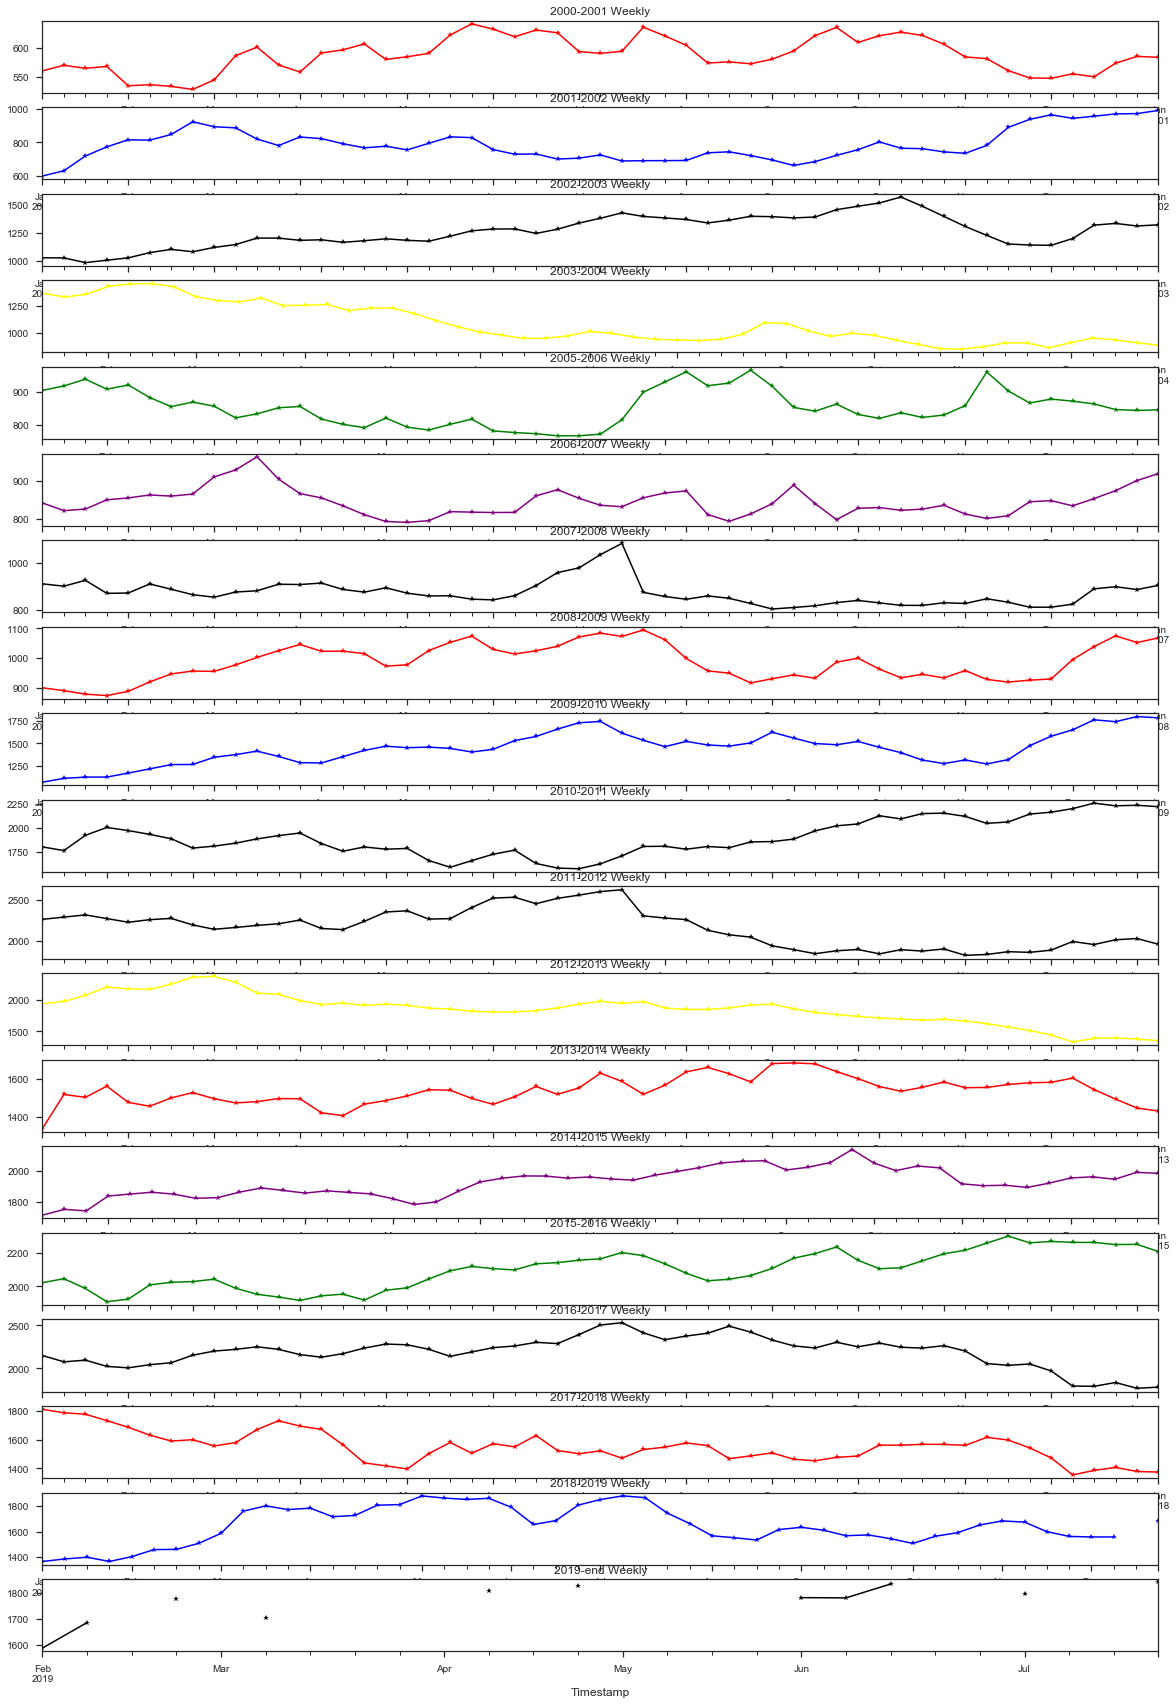

In [368]:
# Deviding the data by weekly
sam1 = df_merge7["2000-01-04":"2001-01-04"].Close_price.resample('w').mean()
sam2 = df_merge7["2001-01-04":"2002-01-04"].Close_price.resample('w').mean()
sam3 = df_merge7["2002-01-04":"2003-01-04"].Close_price.resample('w').mean()
sam4 = df_merge7["2003-01-04":"2004-01-04"].Close_price.resample('w').mean()
sam5 = df_merge7["2004-01-04":"2005-01-04"].Close_price.resample('w').mean()
sam6 = df_merge7["2005-01-04":"2006-01-04"].Close_price.resample('w').mean()
sam7 = df_merge7["2006-01-04":"2007-01-04"].Close_price.resample('w').mean()
sam8 = df_merge7["2007-01-04":"2008-01-04"].Close_price.resample('w').mean()
sam9 = df_merge7["2008-01-04":"2009-01-04"].Close_price.resample('w').mean()
sam10 = df_merge7["2009-01-04":"2010-01-04"].Close_price.resample('w').mean()

sam11 = df_merge7["2010-01-04":"2011-01-04"].Close_price.resample('w').mean()
sam12 = df_merge7["2011-01-04":"2012-01-04"].Close_price.resample('w').mean()
sam13 = df_merge7["2012-01-04":"2013-01-04"].Close_price.resample('w').mean()
sam14 = df_merge7["2014-01-04":"2015-01-04"].Close_price.resample('w').mean()
sam15 = df_merge7["2015-01-04":"2016-01-04"].Close_price.resample('w').mean()
sam16 = df_merge7["2016-01-04":"2017-01-04"].Close_price.resample('w').mean()
sam17 = df_merge7["2017-01-04":"2018-01-04"].Close_price.resample('w').mean()
sam18 = df_merge7["2018-01-04":"2019-01-04"].Close_price.resample('w').mean()
sam19 = df_merge7["2019-01-04":].Close_price.resample('w').mean()

# Ploating
fig, axs = plt.subplots(19,1)
sam1.plot(figsize=(20,30), title= '2000-2001 Weekly', fontsize=10, ax=axs[0], color='red', marker="*")
sam2.plot(figsize=(20,30), title= '2001-2002 Weekly', fontsize=10, ax=axs[1], color='blue', marker="*")
sam3.plot(figsize=(20,30), title= '2002-2003 Weekly', fontsize=10, ax=axs[2], color='black', marker="*")
sam4.plot(figsize=(20,30), title= '2003-2004 Weekly', fontsize=10, ax=axs[3], color='yellow', marker="*")
sam5.plot(figsize=(20,30), title= '2005-2006 Weekly', fontsize=10, ax=axs[4], color='green', marker="*")
sam6.plot(figsize=(20,30), title= '2006-2007 Weekly', fontsize=10, ax=axs[5], color='purple', marker="*")
sam7.plot(figsize=(20,30), title= '2007-2008 Weekly', fontsize=10, ax=axs[6], color='black', marker="*")
sam8.plot(figsize=(20,30), title= '2008-2009 Weekly', fontsize=10, ax=axs[7], color='red', marker="*")
sam9.plot(figsize=(20,30), title= '2009-2010 Weekly', fontsize=10, ax=axs[8], color='blue', marker="*")
sam10.plot(figsize=(20,30), title= '2010-2011 Weekly', fontsize=10, ax=axs[9], color='black', marker="*")

sam11.plot(figsize=(20,30), title= '2011-2012 Weekly', fontsize=10, ax=axs[10], color='black', marker="*")
sam12.plot(figsize=(20,30), title= '2012-2013 Weekly', fontsize=10, ax=axs[11], color='yellow', marker="*")
sam13.plot(figsize=(20,30), title= '2013-2014 Weekly', fontsize=10, ax=axs[12], color='red', marker="*")
sam14.plot(figsize=(20,30), title= '2014-2015 Weekly', fontsize=10, ax=axs[13], color='purple', marker="*")
sam15.plot(figsize=(20,30), title= '2015-2016 Weekly', fontsize=10, ax=axs[14], color='green', marker="*")
sam16.plot(figsize=(20,30), title= '2016-2017 Weekly', fontsize=10, ax=axs[15], color='black', marker="*")
sam17.plot(figsize=(20,30), title= '2017-2018 Weekly', fontsize=10, ax=axs[16], color='red', marker="*")
sam18.plot(figsize=(20,30), title= '2018-2019 Weekly', fontsize=10, ax=axs[17], color='blue', marker="*")
sam19.plot(figsize=(20,30), title= '2019-end Weekly', fontsize=10, ax=axs[18], color='black', marker="*")
plt.show()

In [113]:
#series1 = df_merge6.iloc[0:10,:]
decop = df_merge6[['Close_price', 'Timestamp']]
d = {'Close_price': df_merge6['Close_price'], 'Timestamp': df_merge6['Timestamp']}
s = pd.Series(d)
type(s)

pandas.core.series.Series

In [114]:
plt.plot(seasonal_decompose(decop)) 

AttributeError: 'Int64Index' object has no attribute 'inferred_freq'

In [109]:
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
decompfreq = 24*60/15*7

In [107]:
res = seasonal_decompose(s,freq=decompfreq,model='additive')
resplot = res.plot()
resplot.savefig('Seasonal_Decompose.png', dpi=150)

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

<h3>Box Plot<h3/>

In [43]:
df_box_viol = df_merge6.drop(['Timestamp'], axis=1)
df_box_viol.head()

,Close_price,LQC(coc_mpys_prfr),LQC(coc_mpyn_prfr),LQC(coc-mpyns-wdam),LQC(coc-mpyn-wdam)
0,561,0.0,0.000000,0.000000,0.000000
1,560,0.0,0.000000,0.000000,0.000000
2,556,0.0,-0.004343,0.006369,0.095238
3,564,0.0,0.002181,0.000000,0.000000
4,565,0.0,-0.014851,0.000000,0.000000


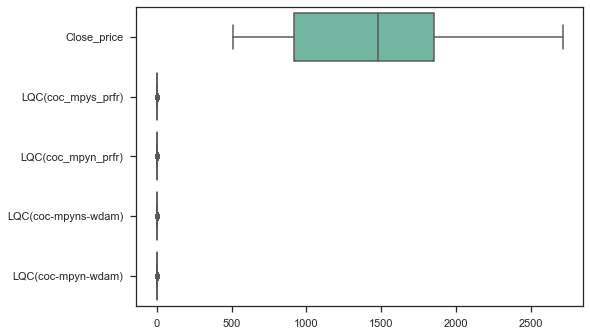

In [493]:
# All of the data once boxplot
ax = sns.boxplot(data=df_box_viol, orient="h", palette="Set2")

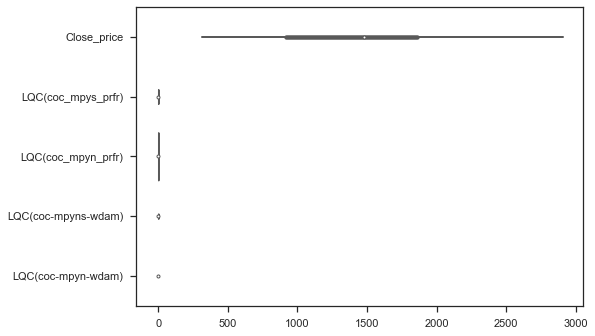

In [495]:
# All of the data once violin plot
ax = sns.violinplot(data=df_box_viol, orient="h", palette="Set2")

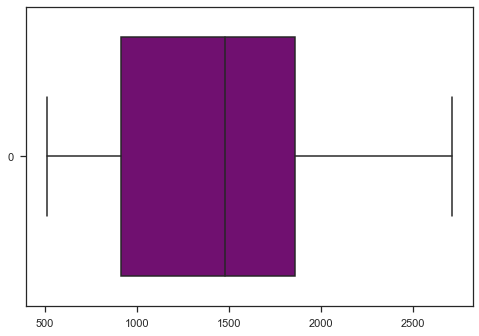

In [472]:
# Boxplot of close_price
sns.boxplot(data=df_merge6['Close_price'], color = 'purple', orient="h")

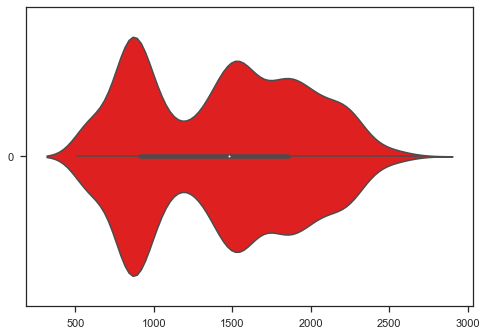

In [483]:
# Violin plot of Close_price
sns.violinplot(data=df_merge6['Close_price'], color = 'red', orient="h")

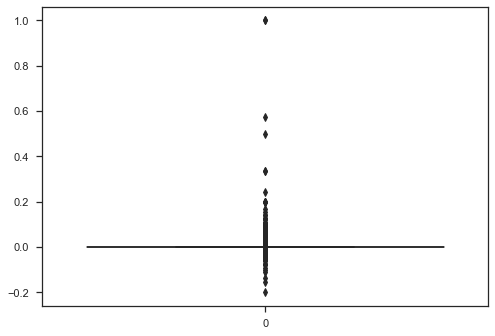

In [477]:
# Boxplot of close_price "LQC(coc_mpys_prfr)"
sns.boxplot(data=df_merge6['LQC(coc_mpys_prfr)'], color = 'purple')

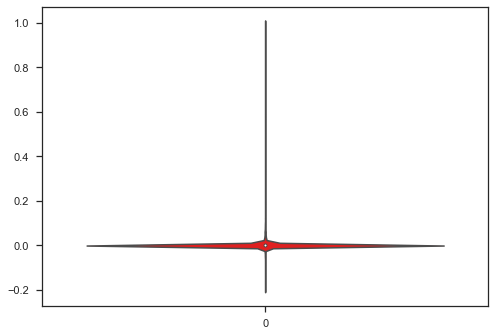

In [478]:
# Violinplot of 'LQC(coc_mpys_prfr)'
sns.violinplot(data=df_merge6['LQC(coc_mpys_prfr)'], color = 'red')

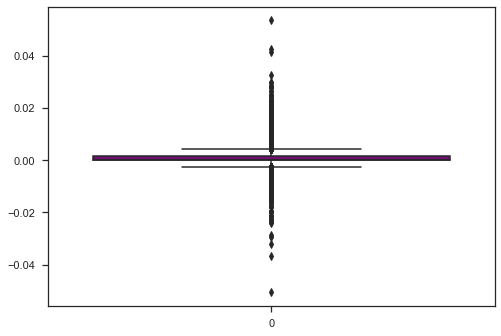

In [480]:
# Boxplot of close_price "LQC(coc_mpyn_prfr)"
sns.boxplot(data=df_merge6['LQC(coc_mpyn_prfr)'], color = 'purple')

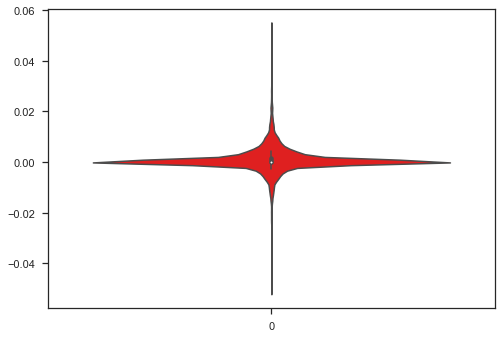

In [479]:
# Violin plot of "LQC(coc_mpyn_prfr)"
sns.violinplot(data=df_merge6['LQC(coc_mpyn_prfr)'], color = 'red')

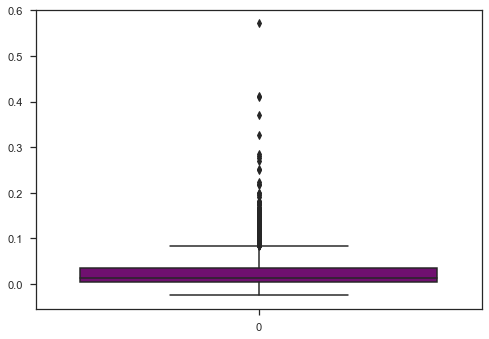

In [482]:
# Boxplot of close_price "LQC(coc-mpyns-wdam)"
sns.boxplot(data=df_merge6['LQC(coc-mpyns-wdam)'], color = 'purple')

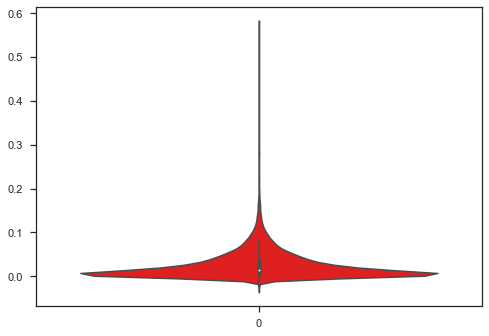

In [481]:
# Violin plot of "LQC(coc-mpyns-wdam)"
sns.violinplot(data=df_merge6['LQC(coc-mpyns-wdam)'], color = 'red')

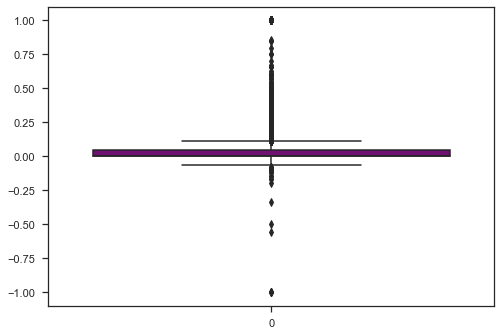

In [497]:
# Boxplot of close_price "LQC(coc-mpyn-wdam)"
sns.boxplot(data=df_merge6['LQC(coc-mpyn-wdam)'], color = 'purple')

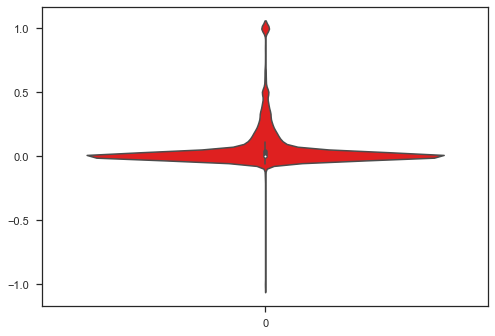

In [489]:
# Violinplot of close_price "LQC(coc-mpyn-wdam)"
sns.violinplot(data=df_merge6['LQC(coc-mpyn-wdam)'], color = 'red')

In [42]:
plt(decompose(df_merge6.drop(['Close_price'])))

NameError: name 'decompose' is not defined

<h3>PCA</h3>

In [40]:
from sklearn.preprocessing import StandardScaler
feat_1 = ['LQC(coc_mpys_prfr)', 'LQC(coc_mpyn_prfr)'] 
feat_2 = ['LQC(coc-mpyns-wdam)','LQC(coc-mpyn-wdam)']

In [41]:
# Take ,out the feature of price forecast news
feat_1x = df_merge6.loc[:, feat_1].values
# Take ,out the feature of weather damage news   
feat_2x = df_merge6.loc[:, feat_2].values
# Separating out the target
y = df_merge6.loc[:,['Close_price']].values
# Standardizing the features of price forecast news
Tx1 = StandardScaler().fit_transform(feat_1x) # dataset’s features onto unit scale (mean = 0 and variance = 1)
Tx2 = StandardScaler().fit_transform(feat_2x) # dataset’s features onto unit scale (mean = 0 and variance = 1)

In [42]:
from sklearn.decomposition import PCA
# PCA for price forecast
pca1 = PCA(n_components=1)
#pca.fit(Tx1)
pro_comp_x1 = pca1.fit_transform(Tx1)
# Comparing the previous data with the projected one
print(Tx1.shape)
print(pro_comp_x1.shape)

(4808, 2)
(4808, 1)


In [43]:
# PCA for Weather Damage
pca2 = PCA(n_components=1)
#pca.fit(Tx2)
pro_comp_x2 = pca2.fit_transform(Tx2)
print(Tx2.shape)
print(pro_comp_x2.shape)

(4808, 2)
(4808, 1)


In [496]:
# To see how much information we lose when we convevrt 2 dimentional into 1 dimention in both 
pca1_info = pca1.explained_variance_ratio_ # This shows that almost around 51% of the information is contained in priceforecast data converted principal components
pca2_info = pca2.explained_variance_ratio_ # This shows that almost around 53% of the information is contained in weatherdamage data converted principal components
print(pca1_info, pca2_info)

[0.51187331] [0.5355508]


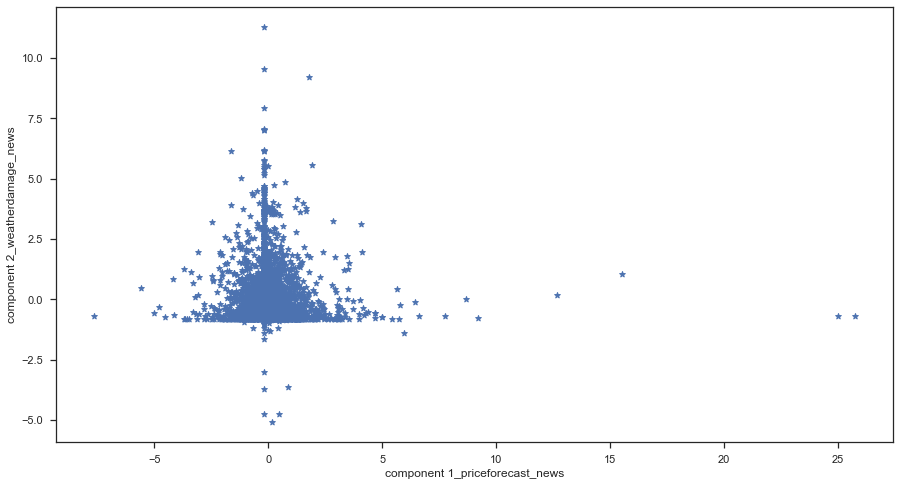

In [44]:
# PCA plot of component 1_priceforecast_news and component 2_weatherdamage_news
plt.figure(figsize=(15,8))
plt.scatter(pro_comp_x1, pro_comp_x2, marker='*')
plt.xlabel('component 1_priceforecast_news')
plt.ylabel('component 2_weatherdamage_news')
plt.show()

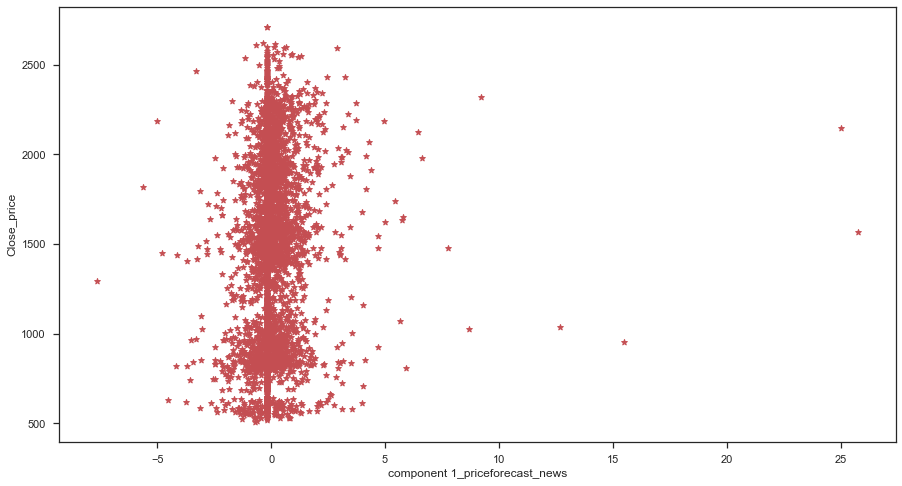

In [45]:
# plot with pca_priceforecast and Close_price
plt.figure(figsize=(15,8))
plt.scatter(pro_comp_x1, df_merge6['Close_price'], c = 'r', marker='*')
plt.xlabel('component 1_priceforecast_news')
plt.ylabel('Close_price')
plt.show()

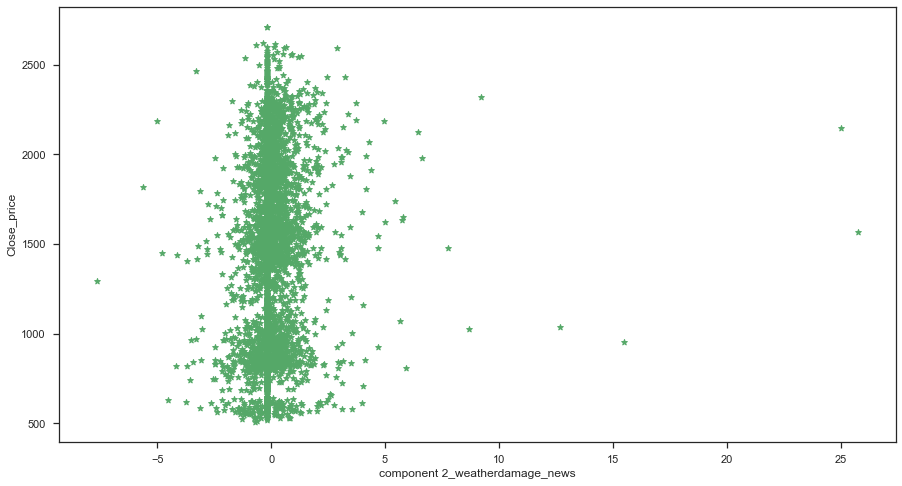

In [46]:
# Plot pca with pca_weatherdamage and Close_price
plt.figure(figsize=(15,8))
plt.scatter(pro_comp_x1, df_merge6['Close_price'], c = 'g', marker='*')
plt.xlabel('component 2_weatherdamage_news')
plt.ylabel('Close_price')
plt.show()

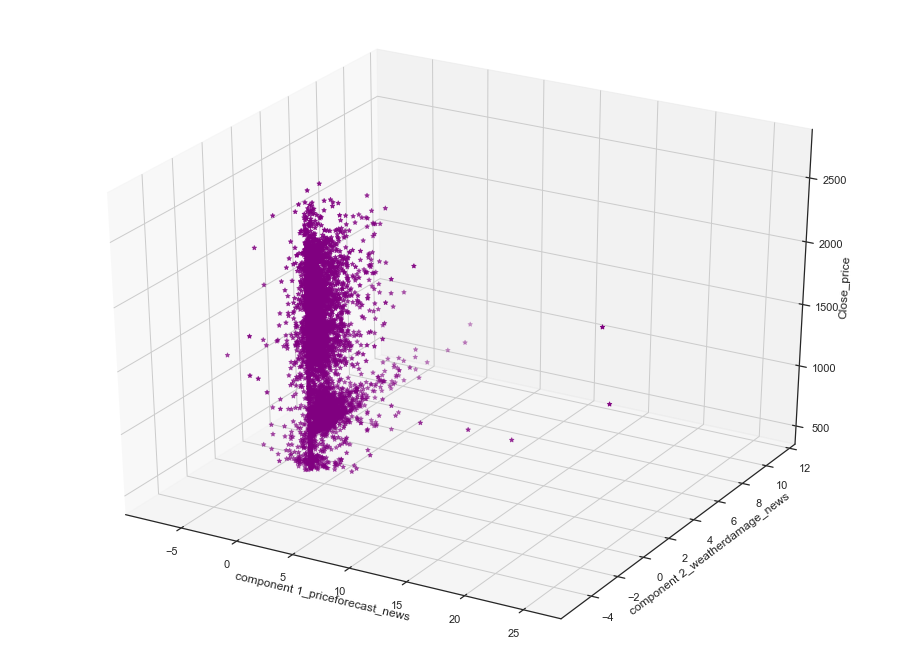

In [47]:
# 3D plot: PCA plot with the first principal components with close price and Timedate
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111, projection ='3d')

x = pro_comp_x1
y = pro_comp_x2
z = df_merge6['Close_price']

ax.scatter(x,y,z, c = 'purple', marker='*')

ax.set_xlabel('component 1_priceforecast_news')
ax.set_ylabel('component 2_weatherdamage_news')
ax.set_zlabel('Close_price')

plt.show()

<h3> Cointegration Test <h3/>

In [48]:
df_caus = df_merge6.drop(['Timestamp'], axis=1)
df_caus.head()

,Close_price,LQC(coc_mpys_prfr),LQC(coc_mpyn_prfr),LQC(coc-mpyns-wdam),LQC(coc-mpyn-wdam)
0,561,0.0,0.000000,0.000000,0.000000
1,560,0.0,0.000000,0.000000,0.000000
2,556,0.0,-0.004343,0.006369,0.095238
3,564,0.0,0.002181,0.000000,0.000000
4,565,0.0,-0.014851,0.000000,0.000000


In [49]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df_caus, alpha=0.05):
    out = coint_johansen(df_caus,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)


    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df_caus.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)
    
cointegration_test(df_caus)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
Close_price ::  1888.07   > 60.0627   =>   True
LQC(coc_mpys_prfr) ::  1163.15   > 40.1749   =>   True
LQC(coc_mpyn_prfr) ::  540.81    > 24.2761   =>   True
LQC(coc-mpyns-wdam) ::  78.06     > 12.3212   =>   True
LQC(coc-mpyn-wdam) ::  0.0       > 4.1296    =>   False


<h3>Split the Series into Training and Testing Data <h3/>

In [50]:
nobs = 4
df_caus_train, df_caus_test = df_caus[0:-nobs], df_caus[-nobs:]

# Check size
print(df_caus_train.shape)  
print(df_caus_test.shape)  

(4804, 5)
(4, 5)


<h3>Check for Stationarity and Make the Time Series Stationary<h3/>

In [58]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")    
          
    adfuller_test(df_caus_train['Close_price'])
    print('\n')
          
# ADF Test on each column
#for name, column in df_caus_train:
          # adfuller_test(column, name = column.name)
          # print('\n')


- What is zero means in this data set ? Can we consider it as a missing value
- EDA (Box plot)
- PCA Plot  or multidimentional scaling plot(To see their collection in differently and easily) or 
- Test for causation
- Test for stationarity
- If needed change it to stationarity
- Find optimal order (p)
- Prepare trainning and test dataset
- Train the Model
- Roll back the model, if any
- Evaluate the model using test set
- Forecast to furure